In [1]:
import xarray as xr
import numpy as np
#import matplotlib.pyplot as plt
import sys
import glob
import os


readDir = '/srv/data2/srai_poseidon/srai_poseidon/observation/SatelliteVsBuoy/downloads/ASCAT_data/downloaded/tracks/'
fileList = glob.glob(readDir + '/*.l2.nc')
writeDir = '/srv/data2/srai_poseidon/srai_poseidon/observation/SatelliteVsBuoy/downloads/ASCAT_data/downloaded/'
tol = 0.1

latList = [-9, -8, -5, -2, 0, 2, 5, 8, 9]
lonList = [-95, -110, -125, -140, -155, -170, -180, 165]

for fileIndex in range(10):
    fileName = fileList[fileIndex]
    sys.stdout.flush()
    ds = xr.open_dataset(fileName)
    timeArr = ds['time'].to_numpy()[:,0]
    ds = ds.drop('time')
    ds['NUMROWS'] = xr.DataArray(timeArr, dims=['NUMROWS'])
    ds = ds.rename({'NUMROWS':'time'})
    
    
    count = 0 
    for thisLat in latList:
        for thisLon in lonList:
            if thisLat < 0:
                latUnit = 'S'
            else:
                latUnit = 'N'
            
            if thisLon < 0:
                lonUnit = 'W'
            else:
                lonUnit = 'E'
    
            wFile = 'test.nc'
            thisLon = (thisLon + 360)%360
    
            mask = np.logical_and((abs(ds['lat'] - thisLat) < tol), (abs(ds['lon'] - thisLon) < tol))
            if np.sum(mask) > 0:
                count +=1
                sub_ds = ds.where(mask, drop=True)
    
            if count > 0:
                break
        if count > 0:
                break    
    ds.close()
    if count > 0:
        break



/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/conventions.py:427: SerializationWarning: variable 'lat' has multiple fill values {1e+30, 1e+30}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/conventions.py:427: SerializationWarning: variable 'lon' has multiple fill values {1e+30, 1e+30}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/conventions.py:427: SerializationWarning: variable 'model_speed' has multiple fill values {1e+30, 1e+30}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/conventions.py:427: SerializationWarning: variable 'model_dir' has multiple fill values {1e+30, 1e+30}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/home/shikhar.rai/anac

In [2]:
ds

<xarray.Dataset>
Dimensions:           (time: 1621, NUMCELLS: 42)
Coordinates:
    lat               (time, NUMCELLS) float32 -89.31 -89.1 ... -73.59 -73.37
    lon               (time, NUMCELLS) float32 298.6 304.2 307.6 ... 296.7 296.7
  * time              (time) datetime64[ns] 2008-01-01T06:03:48 ... 2008-01-0...
Dimensions without coordinates: NUMCELLS
Data variables:
    wvc_index         (time, NUMCELLS) float32 ...
    model_speed       (time, NUMCELLS) float32 ...
    model_dir         (time, NUMCELLS) float32 ...
    ice_prob          (time, NUMCELLS) float32 ...
    ice_age           (time, NUMCELLS) float32 ...
    wvc_quality_flag  (time, NUMCELLS) float64 ...
    wind_speed        (time, NUMCELLS) float32 ...
    wind_dir          (time, NUMCELLS) float32 ...
    bs_distance       (time, NUMCELLS) float32 ...
Attributes: (12/29)
    title:                            MetOp-A ASCAT Level 2 25.0 km Ocean Sur...
    title_short_name:                 ASCATA-L2-25km
    Conventions:                      CF-1.6
    institution:                      EUMETSAT/OSI SAF/KNMI
    source:                           MetOp-A ASCAT
    software_identification_level_1:  901
    ...                               ...
    orbit_inclination:                98.7
    history:                          N/A
    references:                       ASCAT Wind Product User Manual, http://...
    comment:                          Orbit period and inclination are consta...
    creation_date:                    2016-07-28
    creation_time:                    12:45:17

In [3]:
sub_ds

<xarray.Dataset>
Dimensions:           (time: 1, NUMCELLS: 1)
Coordinates:
    lat               (time, NUMCELLS) float32 -9.038
    lon               (time, NUMCELLS) float32 235.1
  * time              (time) datetime64[ns] 2008-01-01T06:26:03
Dimensions without coordinates: NUMCELLS
Data variables:
    wvc_index         (time, NUMCELLS) float32 40.0
    model_speed       (time, NUMCELLS) float32 8.57
    model_dir         (time, NUMCELLS) float32 287.6
    ice_prob          (time, NUMCELLS) float32 nan
    ice_age           (time, NUMCELLS) float32 nan
    wvc_quality_flag  (time, NUMCELLS) float64 0.0
    wind_speed        (time, NUMCELLS) float32 8.78
    wind_dir          (time, NUMCELLS) float32 283.1
    bs_distance       (time, NUMCELLS) float32 -0.2
Attributes: (12/29)
    title:                            MetOp-A ASCAT Level 2 25.0 km Ocean Sur...
    title_short_name:                 ASCATA-L2-25km
    Conventions:                      CF-1.6
    institution:                      EUMETSAT/OSI SAF/KNMI
    source:                           MetOp-A ASCAT
    software_identification_level_1:  901
    ...                               ...
    orbit_inclination:                98.7
    history:                          N/A
    references:                       ASCAT Wind Product User Manual, http://...
    comment:                          Orbit period and inclination are consta...
    creation_date:                    2016-07-28
    creation_time:                    12:45:17

In [4]:
ds

<xarray.Dataset>
Dimensions:           (time: 1621, NUMCELLS: 42)
Coordinates:
    lat               (time, NUMCELLS) float32 -89.31 -89.1 ... -73.59 -73.37
    lon               (time, NUMCELLS) float32 298.6 304.2 307.6 ... 296.7 296.7
  * time              (time) datetime64[ns] 2008-01-01T06:03:48 ... 2008-01-0...
Dimensions without coordinates: NUMCELLS
Data variables:
    wvc_index         (time, NUMCELLS) float32 ...
    model_speed       (time, NUMCELLS) float32 ...
    model_dir         (time, NUMCELLS) float32 ...
    ice_prob          (time, NUMCELLS) float32 ...
    ice_age           (time, NUMCELLS) float32 ...
    wvc_quality_flag  (time, NUMCELLS) float64 ...
    wind_speed        (time, NUMCELLS) float32 ...
    wind_dir          (time, NUMCELLS) float32 ...
    bs_distance       (time, NUMCELLS) float32 ...
Attributes: (12/29)
    title:                            MetOp-A ASCAT Level 2 25.0 km Ocean Sur...
    title_short_name:                 ASCATA-L2-25km
    Conventions:                      CF-1.6
    institution:                      EUMETSAT/OSI SAF/KNMI
    source:                           MetOp-A ASCAT
    software_identification_level_1:  901
    ...                               ...
    orbit_inclination:                98.7
    history:                          N/A
    references:                       ASCAT Wind Product User Manual, http://...
    comment:                          Orbit period and inclination are consta...
    creation_date:                    2016-07-28
    creation_time:                    12:45:17

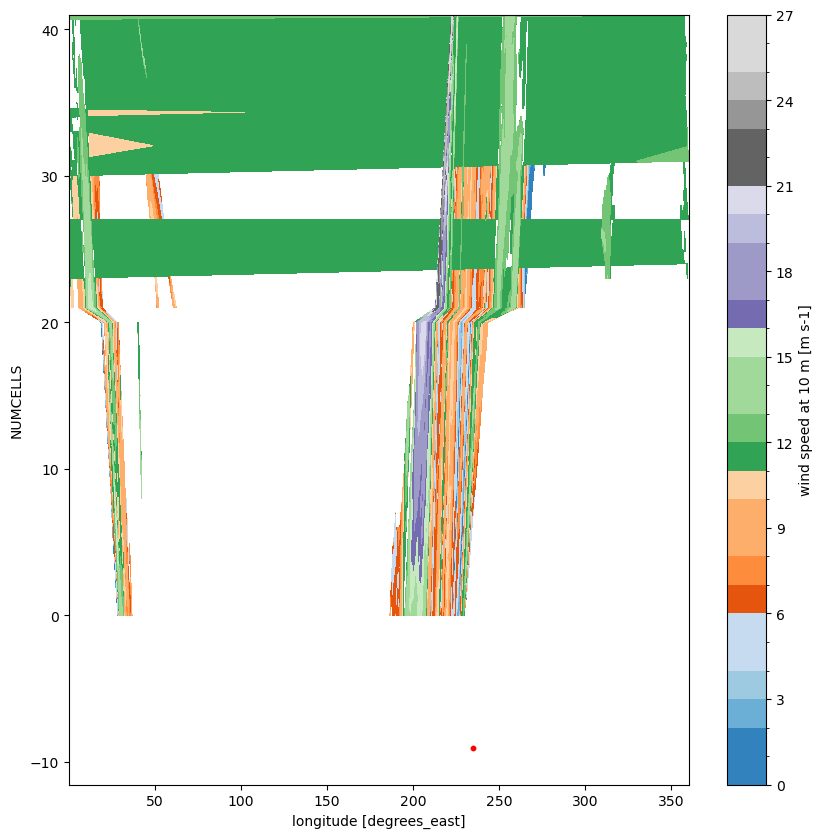

In [12]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
ds.wind_speed.plot.contourf(x = 'lon', Y = 'lat', ax = ax, levels=30, cmap= 'tab20c')
plt.scatter(sub_ds['lon'], sub_ds['lat'], s = 10, c = 'r')

In [6]:
sub_ds['time']

<xarray.DataArray 'time' (time: 1)>
array(['2008-01-01T06:26:03.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2008-01-01T06:26:03

In [7]:
tt[0:2,:]

NameError: name 'tt' is not defined

In [19]:
a = np.zeros((5,5), dtype = ds['wvc_quality_flag'].dtype)

In [20]:
a

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [21]:
ds['wvc_quality_flag'].dtype

dtype('float64')